Random Forest - Mean Absolute Error (MAE): 0.2917
Random Forest - Mean Squared Error (MSE): 0.2585
Random Forest - R-squared (R²): 0.5379
             Feature  Importance
3         num_raters    0.469691
0               year    0.165362
4        num_reviews    0.106036
2         run_length    0.105598
5      genres_Action    0.059241
1        movie_rated    0.035269
6   genres_Adventure    0.012829
8   genres_Biography    0.012408
9      genres_Comedy    0.008365
11      genres_Drama    0.006980
13     genres_Horror    0.005391
7   genres_Animation    0.004372
15    genres_Romance    0.003803
14    genres_Mystery    0.002540
10      genres_Crime    0.001731
12    genres_Fantasy    0.000321
16     genres_Sci-Fi    0.000063
17   genres_Thriller    0.000000


C:\Users\jason\AppData\Local\Temp\ipykernel_25460\3679799336.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_rf['Importance'], y=feature_importance_rf['Feature'], palette='viridis')


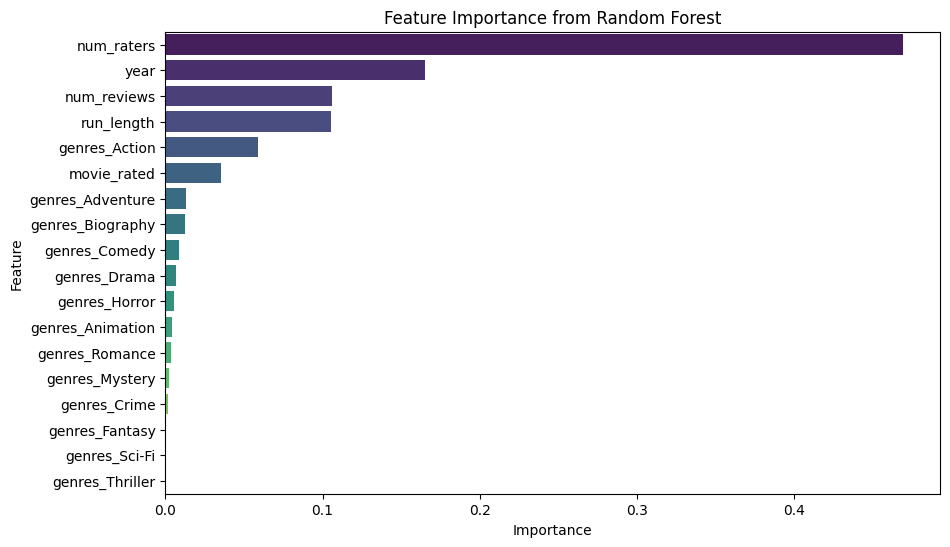

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Import the data
df = pd.read_csv("C:/JPEM_Git_Main/JPEM/JPEM_SAIT/Winter2025_PROJ406/Team 6/data/Copy of merged_dataset.csv")

# Drop unnecessary columns
df = df.drop(columns=['name'])  # Drop 'name' as it is not needed

# Encode 'movie_rated' using LabelEncoder
le = LabelEncoder()
df['movie_rated'] = le.fit_transform(df['movie_rated'])

# One-hot encode 'genres'
encoder = OneHotEncoder(sparse_output=False)
genres_encoded = encoder.fit_transform(df[['genres']])
genres_df = pd.DataFrame(genres_encoded, columns=encoder.get_feature_names_out(['genres']))
df = pd.concat([df, genres_df], axis=1).drop(columns=['genres'])

# Define features (X) and target (y)
X = df.drop(columns=['rating'])  # Features
y = df['rating']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Random Forest - R-squared (R²): {r2_rf:.4f}")

# Feature Importance Analysis
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance_rf)

# Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_rf['Importance'], y=feature_importance_rf['Feature'], palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()